# 1 Exercise 1c

## 1.1 Newsvendor Problem holding cost sensitivity
This notebook contains the plot of exercise 1c. From 1a and b we know that the optimal solution of the Newsvendor Problem is at $F^{-1}_{Y}(\frac{\tilde{p}}{\tilde{p} + \tilde{c}}) = F^{-1}_Y(\frac{p - c}{p + c_h})$. In this notebook we graph the impact of a holding cost.

## 1.2 Import dependencies



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

from scipy.integrate import quad

## 1.3 Auxiliary Functions



In [7]:
def inverse_normal_cdf(percentile: float, location: float, scale: float) -> float:
    return sts.norm.ppf(percentile, loc=location, scale=scale) # Return the inverse cdf of a normal distribution

Function to calculate optimal quantity. Note that $F^{-1}_{Y}(\frac{\tilde{p}}{\tilde{p} + \tilde{c}}) = F^{-1}_Y(\frac{p - c}{p + c_h})$.

In [8]:
def calculate_optimal_quantity(cost: float, price: float, holding_cost: float, location: float, scale: float) -> float:
    percentile = (price - cost)/(price + holding_cost)
    return inverse_normal_cdf(percentile, location, scale)

## 1.4 Sensitivity analysis

For the sensitivity analysis we assume that the demand is $N(100, 10)$ distributed. We set $p = 1.5$, $c = 1$, and draw the graph for the values $c_h \in [-1, 5]$. To draw this graph, we first create an array with 10000 points evenly spaced between the given interval. Then we calculate the optimal quantity for the holding costs corresponding with the points in the array. We then plot the points in this array into the graph. Note that a negative holding cost could be seen as the price for which you can sell left overs (e.g. old news papers can be sold to collectors).

In [48]:
def main():
    points: float = 1000
    cost: float = 0.7
    cost_2: float = 1.0
    cost_3: float = 1.3
    price: float = 1.5
    location: float = 100.0
    scale: float = 10.0

    holding_cost_left_boundry: float = -1
    holding_cost_right_boundry: float = 5.0

    holding_cost_vector: np.ndarray = np.linspace(holding_cost_left_boundry, holding_cost_right_boundry, num=points)
    optimal_quantity_vector: np.ndarray = np.empty(points)
    optimal_quantity_vector_2: np.ndarray = np.empty(points)
    optimal_quantity_vector_3: np.ndarray = np.empty(points)

    for i, holding_cost in enumerate(holding_cost_vector):
        optimal_quantity_vector[i] = calculate_optimal_quantity(cost, price, holding_cost, location, scale)
        optimal_quantity_vector_2[i] = calculate_optimal_quantity(cost_2, price, holding_cost, location, scale)
        optimal_quantity_vector_3[i] = calculate_optimal_quantity(cost_3, price, holding_cost, location, scale)

    plt.plot(holding_cost_vector, optimal_quantity_vector, lw=1)
    plt.plot(holding_cost_vector, optimal_quantity_vector_2, lw=1)
    plt.plot(holding_cost_vector, optimal_quantity_vector_3, lw=1)
    plt.legend(['$c = 0.9$', "$c = 1.0$", "$c = 1.1$"])
    plt.grid(True)
    plt.style.use('fivethirtyeight')
    plt.title("Holding cost optimal order quantity sensitivity")
    plt.xlabel("$c_h$", loc="right")
    plt.ylabel("$Q^*(F_Y; \\tilde{c}, \\tilde{p})$", loc="top")
    plt.show()

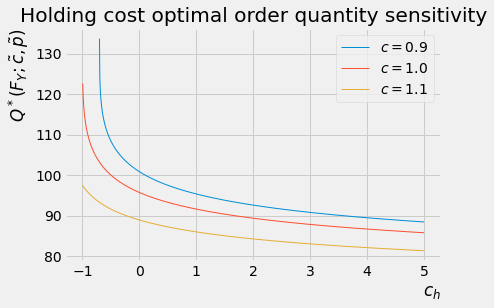

In [49]:
main()

## Expected profit

$\tilde{p}\,Q - (\tilde{p} + \tilde{c})\,\int _{-\infty}^{Q} F_{Y}(y)\,dy$

In [50]:
def _expected_profit(cost: float, price: float, location: float, scale: float, n: int, holding_cost: float) -> float:
    profit_per_product: float = price - cost
    cost_per_unsold_product: float = cost + holding_cost
    quantity: float = calculate_optimal_quantity(cost, price, holding_cost, location, scale)
    integral: float = quad(lambda y: sts.norm.cdf(y, loc=location, scale=scale), -np.inf, quantity)[0]

    return profit_per_product * quantity - (profit_per_product + cost_per_unsold_product)*integral

In [53]:
def expected_profit():
    points: int = 1000
    cost: float = 0.9
    cost_2: float = 1.0
    cost_3: float = 1.1
    price: float = 1.5
    location: float = 100.0
    scale: float = 10.0
    n: int = 10
    holding_cost_vector: np.ndarray = np.linspace(-0.99, 5, points)
    expected_profit_vector: np.ndarray = np.empty(points)
    expected_profit_vector_2: np.ndarray = np.empty(points)
    expected_profit_vector_3: np.ndarray = np.empty(points)

    for i in range(points):
        expected_profit_vector[i] = _expected_profit(cost, price, location, scale, n, holding_cost_vector[i])
        expected_profit_vector_2[i] = _expected_profit(cost_2, price, location, scale, n, holding_cost_vector[i])
        expected_profit_vector_3[i] = _expected_profit(cost_3, price, location, scale, n, holding_cost_vector[i])

    plt.plot(holding_cost_vector, expected_profit_vector, lw=1)
    plt.plot(holding_cost_vector, expected_profit_vector_2, lw=1)
    plt.plot(holding_cost_vector, expected_profit_vector_3, lw=1)
    plt.legend(['$c = 0.9$', "$c = 1.0$", "$c = 1.1$"])
    plt.grid(True)
    plt.style.use('fivethirtyeight')
    plt.title("Holding cost expected profit sensitivity")
    plt.xlabel("$c_h$", loc="right")
    plt.ylabel("$E_Y [\Pi (Q, \,Y; \,\\tilde{c}, \,\\tilde{p})]$", loc="top")
    plt.show()

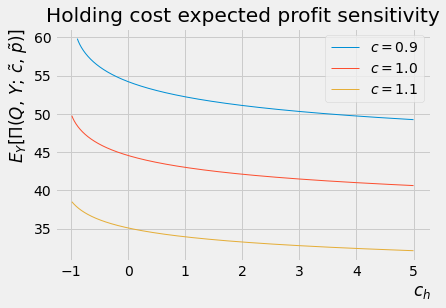

In [54]:
expected_profit()